# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [107]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [108]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [109]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [110]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

In [111]:
df_neighbourhood_locations

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718
...,...,...,...
135,Wychwood,43.676919,-79.425515
136,Yonge-Eglinton,43.704689,-79.403590
137,Yonge-St.Clair,43.687859,-79.397871
138,York University Heights,43.765736,-79.488883


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [112]:
# Getting the data from the top 10 expensive neighbourhoods
en = to_data[["neighbourhood", "single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house", "average_house_value"]]
en = en.reset_index()
en = en.sort_values(by=["average_house_value"], ascending=False)
en = en[:11]

# Calculate the mean number of dwelling types units per year
dwelling_types = to_data[["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]]

# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_costs = to_data[["shelter_costs_owned", "shelter_costs_rented"]]
monthly_costs = shelter_costs.groupby("year").mean()

In [113]:
mean = to_data.groupby("neighbourhood").mean()
df_all_neighbourhoods = mean.reset_index()
df_all_neighbourhoods
df_all_neighbourhoods = pd.merge(
    df_neighbourhood_locations, df_all_neighbourhoods, on="neighbourhood"
)
df_all_neighbourhoods.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Panel Visualization Functions

In [114]:
 # Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    return px.scatter_mapbox(
    df_all_neighbourhoods,
    lat="lat",
    lon="lon",
    size="average_house_value",
    color="average_house_value",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=9,
    hover_name="neighbourhood",
    hover_data = [
        "shelter_costs_owned",
        "shelter_costs_rented",
        "single_detached_house",
        "apartment_five_storeys_plus",
        "movable_dwelling",
        "semi_detached_house",
        "row_house",
        "duplex",
        "apartment_five_storeys_less",
        "other_house"
    ]
)

In [114]:
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    data.plot(figsize=(5,5), kind="bar", title=title, x=xlabel, y=ylabel, color=color)
    return data
    

In [ ]:
chart_2006 = create_bar_chart(dwelling_types_per_year.iloc[1], "Numbers Per Dwelling Type: 2001", "Dwelling Type", "Number of Dwellings", "blue")

In [114]:
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    data.plot(figsize=(5,5), kind="line", title=title, x=xlabel, y=ylabel, color=color)
    return data

In [147]:
def average_house_value():
    """Average house values per year."""
    yearly_avg = dwelling_types.groupby("year").sum()
    yearly_avg = yearly_avg.sum(axis = 1)
    return yearly_avg.plot(figsize=(5,5), kind="line", title="Average House Values Per Year", x="Year", y="Price", color="blue")

In [115]:
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    neigh_val = to_data[["neighbourhood", "average_house_value"]]
    return neigh_val.hvplot.line(title="Average House Value by Neighbourhood", x="year", y="average_house_value", xlabel="Average Value", ylabel="Year", groupby="neighbourhood")

In [116]:
average_value_by_neighbourhood()

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

In [114]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    dt = to_data[["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house", "neighbourhood"]]
    dt["dt_avg"] = dt["single_detached_house"] + dt["apartment_five_storeys_plus"] + dt["movable_dwelling"] + dt["semi_detached_house"] + dt["row_house"] + dt["duplex"] + dt["apartment_five_storeys_less"] + dt["other_house"]
    dt = dt.drop(columns=["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"])
    return dt.hvplot.line(title="Dwelling Types Per Year by Neighbourhood", x="year", y="dt_avg", xlabel="Year", ylabel="Average Dwelling Types Per Year", groupby="neighbourhood")

In [114]:
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""
    yearly_avg = dwelling_types.groupby("year").sum()
    yearly_avg = yearly_avg.sum(axis = 1)
    return yearly_avg.plot(figsize=(5,5), kind="line", title="Average House Values Per Year", x="Year", y="Price", color="blue")

In [114]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    en = to_data[["neighbourhood", "single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house", "average_house_value"]]
    en = en.reset_index()
    en = en.sort_values(by=["average_house_value"], ascending=False)
    en = en[:11]
    return en.hvplot.bar(title="Top 10 Expensive Neighbourhoods in Toronto", width=1000, x="neighbourhood", y="average_house_value", xlabel="Neighbourhood", ylabel="Average House Value")

In [136]:
top_most_expensive_neighbourhoods

<function __main__.top_most_expensive_neighbourhoods()>

In [114]:
def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] HoloViews(Bars, name='Most Expensive N...)
    [1] Str(AxesSubplot, name='rectilinear')

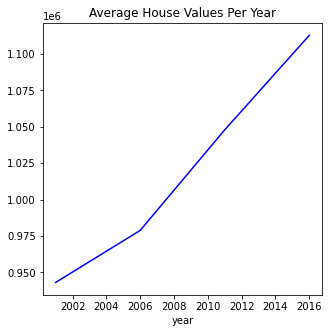

In [148]:
# Create a Title for the Dashboard
column = pn.Column(
    '# Toronto, ON, Real Estate By Neighbourhood: 2001-2016')

# Define a welcome text
#text = pn.Row("## Welcome investors and renters")
panel = pn.Column(
    column,
    #text
)
column
# Create a tab layout for the dashboard
tabs = pn.Tabs(
    #("Welcome", neighbourhood_map),
    ("Most Expensive Neighbourhoods", top_most_expensive_neighbourhoods()),
     average_house_value())
tabs

# Create the main dashboard
# YOUR CODE HERE!

In [ ]:
neigh_map = pn.Row(neighbourhood_map)

dt = pn.Row(number_dwelling_types)
avg_val = pn.Row(average_house_value_snapshot)
most_ex = pn.Row(top_most_expensive_neighbourhoods)

   dt,
    avg_val,
    most_ex

In [97]:
tabs = pn.Tabs(
    ("Map", neighbourhood_map),   
    ("Bar Chart", create_bar_chart),
    ("Line Chart", create_line_chart),
    ("Average House Value", average_house_value),
    ("Average Value by Neighbourhood", average_value_by_neighbourhood),
    ("Number of Dwelling Types Per Year", number_dwelling_types),
    ("Average house value for all Toronto's neighbourhoods per year", average_house_value_snapshot),
    ("Top 10 most expensive neighbourhoods", top_most_expensive_neighbourhoods))
tabs

ValueError: cannot find widget or abbreviation for argument: 'data'

## Serve the Panel Dashboard

In [ ]:
dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# neighbourhood_map().show()

In [ ]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [ ]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [ ]:
# average_house_value()

In [ ]:
# average_value_by_neighbourhood()

In [ ]:
# number_dwelling_types()

In [ ]:
# average_house_value_snapshot()

In [ ]:
# top_most_expensive_neighbourhoods()

In [ ]:
# sunburts_cost_analysis()